In [10]:
%load_ext autoreload
%autoreload 2


import sys
sys.path.append('/global/homes/l/lbigwood/S4Mock/')
#import mxxl_real
import glob
from astropy.table import vstack,Table
from fa_tools import fa_plot
import astropy.io.fits as fits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
ledger = vstack([Table.read(x) for x in glob.glob('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/sv3/bright/initial/sv3mtl-bright-hp-*.ecsv')])

Requested fieldrot=-25.5 arcsec delta=-0.0 arcsec
Requested fieldrot=-25.5 arcsec delta=-0.0 arcsec


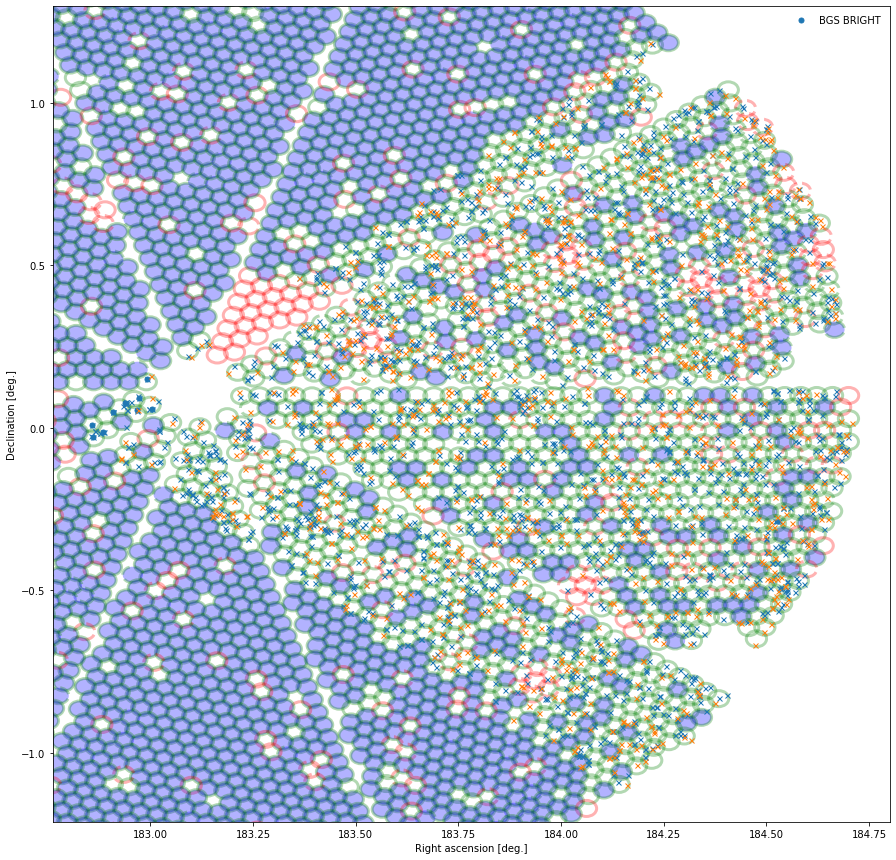

<Figure size 432x288 with 0 Axes>

In [7]:
fa_plot('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000066.fits',ledger)

In [11]:
p = fits.open('/global/cscratch1/sd/mjwilson/altmtls/ledger/initial/Univ000/fa/SV3/20210406/fba-000012.fits')